In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym, rec_gym
import numpy as np
import tensorflow as tf

from rec_gym.runner import run_experiment
import gin
from rec_gym.envs import prim_env_v1, prim_env_v2, prim_env_v2_refactored

import pickle

/home/anton/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
gin.parse_config("""
PrimEnv1.n_items = 100
PrimEnv1.n_users = 10
PrimEnv1.n_rec   = 4
PrimEnv1.embedding_dimension = 2
PrimEnv1.cluster_var = 16
PrimEnv1.in_cluster_var = 4
PrimEnv1.user_change_prob = 0.05
PrimEnv1.reward_noise = 0
PrimEnv1.user_init_sigma = 4
PrimEnv1.user_ar_coef = 1
PrimEnv1.user_drift_sigma = 0
PrimEnv1.seed = 53
PrimEnv1.user_type = 'drifting'

PrimEnv2.n_items = 1000
PrimEnv2.n_users = 1
PrimEnv2.n_rec   = 4
PrimEnv2.embedding_dimension = 2
PrimEnv2.cluster_var = 16
PrimEnv2.in_cluster_var = 4
PrimEnv2.user_change_prob = 0.05
PrimEnv2.reward_noise = 0
PrimEnv2.user_init_sigma = 4
PrimEnv2.user_ar_coef = 1
PrimEnv2.user_drift_sigma = 0
PrimEnv2.seed = 53
PrimEnv2.user_type = 'none'
PrimEnv2.new_items_interval = 1000
PrimEnv2.new_items_size = 0.
PrimEnv2.return_items_objects = False

PrimEnv2Ref.n_items = 2000
PrimEnv2Ref.n_users = 1
PrimEnv2Ref.n_rec   = 4
PrimEnv2Ref.embedding_dimension = 2
PrimEnv2Ref.user_change_prob = 0.05
PrimEnv2Ref.reward_noise = 0
PrimEnv2Ref.user_init_sigma = 4
PrimEnv2Ref.user_ar_coef = 1
PrimEnv2Ref.user_drift_sigma = 0
PrimEnv2Ref.initial_n_clusters = 4
PrimEnv2Ref.cluster_var = 16
PrimEnv2Ref.in_cluster_var = 4
PrimEnv2Ref.new_items_interval = 1000
PrimEnv2Ref.new_items_size = 0.
PrimEnv2Ref.return_items_objects = False
PrimEnv2Ref.click_prob_type = 'normal'
""")

def make_env():
    env = gym.make('prim-gym-v2-ref-v1')
    return env

In [4]:
from agents.ddpg import DDPGAgent

Using TensorFlow backend.


In [21]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

env = make_env()

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

agent = DDPGAgent(action_size = action_size,
                 state_dim = state_dim,
                 action_dim = action_dim,
                 gamma = .9,
                 sess = sess,
                 optimizer = tf.train.AdamOptimizer(
                     learning_rate=0.001
                 ),
                 max_tf_checkpoints_to_keep = 3,
                 experience_size = 2000,
                 per = True,
                 batch_size = 64, 
                 start_steps = 2000)

/home/anton/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [22]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=20000, t_test=200)

  0%|          | 63/20000 [00:04<22:04, 15.05it/s]/media/anton/0b9d5a44-bb63-4de1-9cfe-0da47b81e88a/TPT/3A/PRIM Vente Privee/rec_gym/agents/utils.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  max_weight = (p_min * n) ** (-self.PER_b)
100%|██████████| 200/200 [00:44<00:00,  4.49it/s]


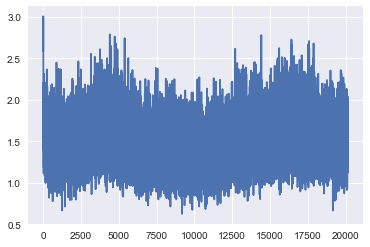

In [23]:
import matplotlib.pylab as plt
plt.plot(agent.td_losses)

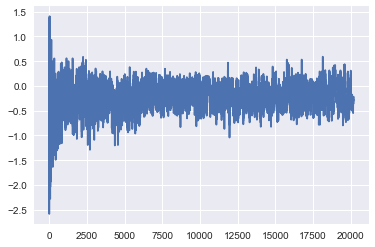

In [24]:
plt.plot(np.array(agent.qvalues).reshape(-1))

In [25]:
np.sum( [len(v) for v in env.bought_items.values() ])

903

In [26]:
len(env.bought_items[7])

62

In [27]:
env.interactions[500:]

[Interaction(t=500, uid=7, recs=[1246, 811, 204, 842], rewards=[0, 0, 0, 0], probs=[0.006168786322426483, 1.4689171174466767e-10, 1.9816386591899753e-05, 1.0710058027316135e-07], best_ps=[0.2652558370421041, 0.2612813573645517, 0.2605740912007829, 0.260115198675164], ranks=[381, 1661, 1032, 1395]),
 Interaction(t=501, uid=7, recs=[1427, 1280, 1226, 9], rewards=[0, 0, 0, 0], probs=[1.790400111131726e-21, 5.078189770082117e-06, 5.039024495899604e-05, 6.678309377096767e-08], best_ps=[0.2652558370421041, 0.2612813573645517, 0.2605740912007829, 0.260115198675164], ranks=[1990, 1136, 946, 1423]),
 Interaction(t=502, uid=7, recs=[1612, 1375, 1188, 1139], rewards=[0, 0, 0, 0], probs=[3.46659754931384e-10, 4.644869023449027e-14, 3.788354123702751e-11, 1.8762179675039312e-10], best_ps=[0.2652558370421041, 0.2612813573645517, 0.2605740912007829, 0.260115198675164], ranks=[1621, 1846, 1696, 1649]),
 Interaction(t=503, uid=7, recs=[1468, 689, 1186, 81], rewards=[0, 0, 0, 0], probs=[9.95238243808771

In [28]:
from agents.utils import data_exploring_widget
data_exploring_widget(env)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time:', max=20200), Output()), …

<Figure size 720x360 with 0 Axes>

---

In [29]:
from agents.baselines import RandomAgent

env = make_env()

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

agent = RandomAgent(action_size = action_size)

In [30]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=20000, t_test=200)

100%|██████████| 200/200 [00:11<00:00, 16.90it/s]


In [31]:
np.sum( [len(v) for v in env.bought_items.values() ])

1121

In [32]:
from agents.utils import data_exploring_widget
data_exploring_widget(env)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time:', max=20200), Output()), …

<Figure size 720x360 with 0 Axes>

---

In [17]:
from agents.dqn import Qagent

env = make_env()

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

tf.reset_default_graph()
sess = tf.InteractiveSession()
agent = Qagent(sess=sess,
                 state_dim=(state_dim,),
                 action_dim=(action_dim,),
                 epsilon=0.4,
                 action_size=action_size,
                 logdir='./logs/',
                 replay_size=1000,
                 batch_size=2)

/home/anton/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [18]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=10000, t_test=200)

100%|██████████| 200/200 [00:14<00:00, 14.12it/s]


In [19]:
np.sum( [len(v) for v in env.bought_items.values() ])

217

In [20]:
from agents.utils import data_exploring_widget
data_exploring_widget(env)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time:', max=10200), Output()), …

<Figure size 720x360 with 0 Axes>

----

In [18]:
from agents.dqn import Qagent

env = make_env()

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

tf.reset_default_graph()
sess = tf.InteractiveSession()
agent = Qagent(sess=sess,
                 state_dim=(state_dim,),
                 action_dim=(action_dim,),
                 epsilon=0.4,
                 action_size=action_size,
                 logdir='./logs/',
                 replay_size=1000,
                 batch_size=50)

/home/anton/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [19]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=100, t_test=200)




  0%|          | 0/100 [00:00<?, ?it/s]


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]


  4%|▍         | 4/100 [00:00<00:06, 15.85it/s]


  6%|▌         | 6/100 [00:00<00:05, 16.02it/s]


  8%|▊         | 8/100 [00:00<00:05, 15.94it/s]


 10%|█         | 10/100 [00:00<00:05, 15.88it/s]


 12%|█▏        | 12/100 [00:00<00:05, 15.85it/s]


 14%|█▍        | 14/100 [00:00<00:05, 15.89it/s]


 16%|█▌        | 16/100 [00:01<00:05, 15.90it/s]


 18%|█▊        | 18/100 [00:01<00:05, 15.65it/s]


 20%|██        | 20/100 [00:01<00:05, 15.59it/s]


 22%|██▏       | 22/100 [00:01<00:05, 15.45it/s]


 24%|██▍       | 24/100 [00:01<00:04, 15.54it/s]


 26%|██▌       | 26/100 [00:01<00:04, 15.58it/s]


 28%|██▊       | 28/100 [00:01<00:04, 15.63it/s]


 30%|███       | 30/100 [00:01<00:04, 15.52it/s]


 32%|███▏      | 32/100 [00:02<00:04, 15.55it/s]


 34%|███▍      | 34/100 [00:02<00:04, 15.54it/s]


 36%|███▌      | 36/100 [00:02<00:04, 15.54it/s]


 38%|███▊      | 38/100 [00:02<00:03, 15.

 98%|█████████▊| 196/200 [00:46<00:00,  4.22it/s]


 98%|█████████▊| 197/200 [00:46<00:00,  4.22it/s]


 99%|█████████▉| 198/200 [00:46<00:00,  4.22it/s]


100%|█████████▉| 199/200 [00:47<00:00,  4.22it/s]


100%|██████████| 200/200 [00:47<00:00,  4.21it/s]




In [20]:
env.bought_items

defaultdict(set,
            {0: {5, 488, 507, 656, 784, 864, 1051, 1129, 1578, 1742, 1771}})